In [51]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

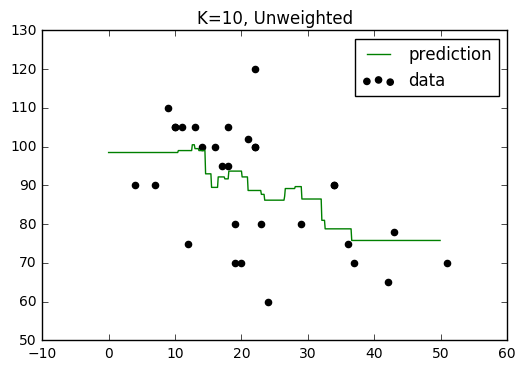

In [52]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1).reshape(-1,1)

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

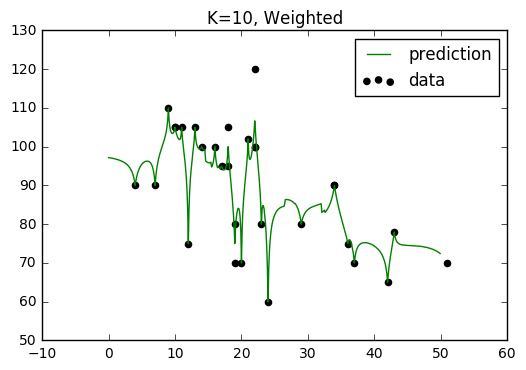

In [53]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [54]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


In [55]:
music.head()

,duration,loudness,bpm
0,184,18,105
1,134,34,90
2,243,43,78
3,186,36,75
4,122,22,120


In [56]:
X = music[['duration', 'loudness']]
Y = music['bpm']
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [57]:
from sklearn.cross_validation import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
transformer = StandardScaler()

In [72]:
X = transformer.fit_transform(X)

In [73]:
knn = neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.569628001567037
0.6976


In [87]:
scores=[]
for i in np.arange(1, 24):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    print(i, knn.score(X_train, y_train), knn.score(X_test, y_test))
    score = knn.score(X_test, y_test)
    scores.append(score)

1 0.9844448541272987 -0.5599999999999998
2 0.569628001567037 0.6976
3 0.43076807853620325 0.3896000000000004
4 0.4247220957966539 0.5666500000000001
5 0.380562981057289 0.22729599999999994
6 0.3017554270175601 0.18006666666666682
7 0.23020122691653977 0.449763265306122
8 0.23816242596902804 0.422725
9 0.2431000445530106 0.3572444444444443
10 0.24766603677927823 0.12056800000000012
11 0.23574740119078044 -0.17883636363636415
12 0.2310292033460849 -0.1786333333333341
13 0.19287109335051109 -0.0663952662721885
14 0.2067812088194266 0.01224081632653129
15 0.2016262616951653 -0.2652479999999995
16 0.14802096325960967 -0.32358124999999993
17 0.14291845953859972 -0.3213038062283737
18 0.10217234333471603 -0.27494074074074093
19 0.09066211522917589 -0.3518581717451521
20 0.09150442745540853 -0.32544200000000023
21 0.07884648305559028 -0.2797714285714281
22 0.07120256132831726 -0.2555024793388425
23 0.05534863522027423 -0.2414351606805294


In [84]:
scores

[-0.5599999999999998,
 0.6976,
 0.3896000000000004,
 0.5666500000000001,
 0.22729599999999994,
 0.18006666666666682,
 0.449763265306122,
 0.422725,
 0.3572444444444443,
 0.12056800000000012,
 -0.17883636363636415,
 -0.1786333333333341,
 -0.0663952662721885,
 0.01224081632653129,
 -0.2652479999999995,
 -0.32358124999999993,
 -0.3213038062283737,
 -0.27494074074074093,
 -0.3518581717451521,
 -0.32544200000000023,
 -0.2797714285714281,
 -0.2555024793388425,
 -0.2414351606805294]

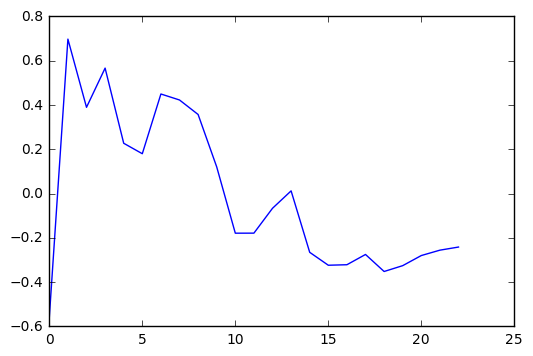

In [85]:
plt.plot(scores)

(array([4., 1., 1., 1., 1., 6., 4., 1., 1., 1., 2., 0., 1., 1., 0., 0., 0.,
        0., 2., 3.]),
 array([102.  , 117.05, 132.1 , 147.15, 162.2 , 177.25, 192.3 , 207.35,
        222.4 , 237.45, 252.5 , 267.55, 282.6 , 297.65, 312.7 , 327.75,
        342.8 , 357.85, 372.9 , 387.95, 403.  ]),
 <a list of 20 Patch objects>)

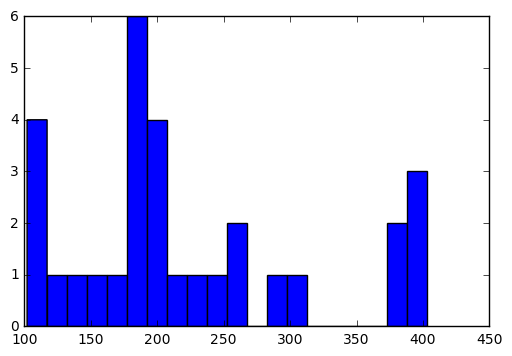

In [64]:
plt.hist(music['duration'], bins=20)

(array([1., 1., 0., 3., 1., 2., 1., 1., 3., 2., 2., 3., 2., 0., 0., 1., 0.,
        0., 0., 2., 1., 1., 0., 0., 2., 0., 0., 0., 0., 1.]),
 array([ 4.        ,  5.56666667,  7.13333333,  8.7       , 10.26666667,
        11.83333333, 13.4       , 14.96666667, 16.53333333, 18.1       ,
        19.66666667, 21.23333333, 22.8       , 24.36666667, 25.93333333,
        27.5       , 29.06666667, 30.63333333, 32.2       , 33.76666667,
        35.33333333, 36.9       , 38.46666667, 40.03333333, 41.6       ,
        43.16666667, 44.73333333, 46.3       , 47.86666667, 49.43333333,
        51.        ]),
 <a list of 30 Patch objects>)

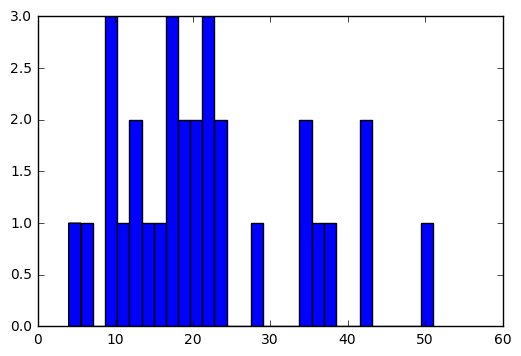

In [65]:
plt.hist(music['loudness'], bins=30)

(array([1., 0., 1., 0., 0., 4., 0., 2., 0., 1., 3., 0., 0., 0., 0., 4., 0.,
        2., 0., 0., 4., 1., 5., 0., 0., 1., 0., 0., 0., 1.]),
 array([ 60.,  62.,  64.,  66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,
         82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,  98., 100., 102.,
        104., 106., 108., 110., 112., 114., 116., 118., 120.]),
 <a list of 30 Patch objects>)

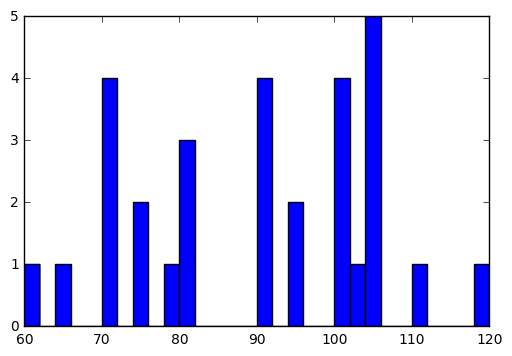

In [66]:
plt.hist(music['bpm'], bins=30)

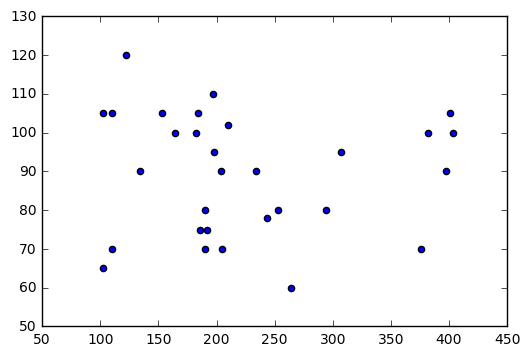

In [67]:
plt.scatter(music['duration'], music['bpm'])

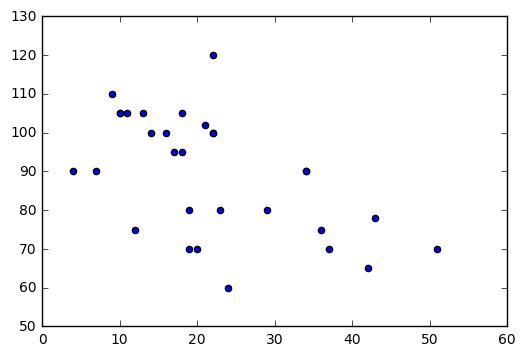

In [68]:
plt.scatter(music['loudness'], music['bpm'])